# Import liabraries

In [1]:
#TO PREPROCESS THE DATA 
import numpy as np
import pandas as pd
import seaborn as sns
from spectral import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
import plotly.graph_objects as pg
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#TO IMPLEMENT MACHINE LEARNING ALGORITHM
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#TO IMPLEMENT ANN AND CNN
import keras
from keras.utils import to_categorical
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, Flatten, Dense, Dropout, Input, BatchNormalization

#TO EVALUATE YOUR MODEL
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Extract the data

In [291]:
X=loadmat("PaviaU.mat")['paviaU']
Y=loadmat("PaviaU_gt.mat")['paviaU_gt']

X.shape,Y.shape

((610, 340, 103), (610, 340))

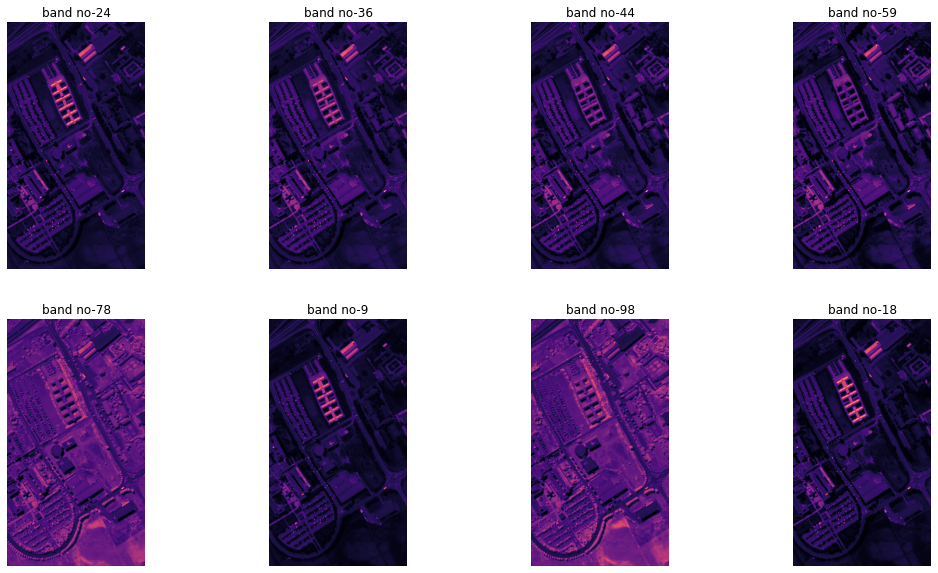

In [178]:
sns.axes_style('whitegrid')
fig=plt.figure(figsize=(18,10))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    ran_val=np.random.randint(X.shape[2])
    plt.imshow(X[:,:,ran_val], cmap='magma')
    plt.axis("off")
    plt.title(f'band no-{ran_val}')

# visualize Ground Truth

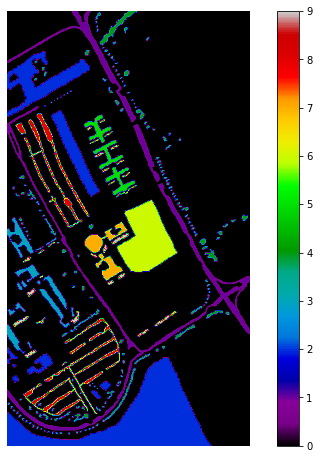

In [179]:
plt.figure(figsize=(10, 8))
plt.imshow(Y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

jet' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

# Test-1: With MNF+RF , Comparison of SAM

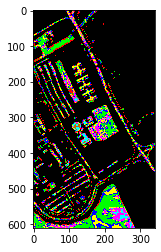

In [286]:
classes = create_training_classes(X, Y, True)
means = np.zeros((len(classes), X.shape[2]), float)
#classes
for (i, c) in enumerate(classes):
    means[i] = c.stats.mean
angles = msam(X, means)
clmap = np.argmax(angles, 2)
v = imshow(classes=((clmap + 1) * (Y != 0)))

Before applying MNF:  (610, 340, 103)
After applying MNF:  (610, 340, 50)


ImageView object:
  Display bands       :  [0, 25.0, 49]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.1999890536796342, 0.4209380044976845]
    G: [-0.1371628640565491, 0.11644364018528475]
    B: [-0.08243470084869396, 0.05839864417064061]

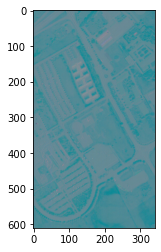

In [287]:
signal = calc_stats(X)
noise = noise_from_diffs(X)
mnfr = mnf(signal, noise)

denoised = mnfr.denoise(X, snr=10)

print("Before applying MNF: ",denoised.shape)

mnf_data = mnfr.reduce(X, snr=10)
mnf_data= mnfr.reduce(X, num=50)
print("After applying MNF: ",mnf_data.shape)
imshow(mnf_data)

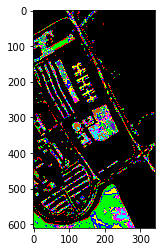

In [288]:
classes = create_training_classes(mnf_data, Y, True)
means = np.zeros((len(classes), mnf_data.shape[2]), float)
#classes
for (i, c) in enumerate(classes):
    means[i] = c.stats.mean
angles = msam(mnf_data, means)
clmap = np.argmax(angles, 2)
v = imshow(classes=((clmap + 1) * (Y != 0)))

In [306]:
print(len(classes))
print(means.shape)
print(angles.shape)
angles

9
(9, 50)
(610, 340, 9)


array([[[-5.53226141e-01,  4.29578177e-01, -5.06563269e-01, ...,
         -5.58703686e-01, -5.10358843e-01, -2.33832615e-01],
        [-4.04025284e-01,  3.54931567e-01, -4.62842807e-01, ...,
         -4.37599343e-01, -4.98351990e-01, -6.66663333e-02],
        [-2.99966828e-01,  2.93638941e-01, -4.79483534e-01, ...,
         -3.69842809e-01, -5.45596891e-01,  9.05565740e-02],
        ...,
        [-6.13931524e-01,  6.97043337e-01, -6.43045334e-01, ...,
         -6.52745839e-01, -6.21872274e-01, -2.26341243e-01],
        [-5.18730216e-01,  6.10059115e-01, -5.98052804e-01, ...,
         -5.47528402e-01, -5.58008506e-01, -1.75175631e-01],
        [-3.94125119e-01,  5.51740732e-01, -5.59874791e-01, ...,
         -4.70329979e-01, -5.70465763e-01, -1.41595360e-02]],

       [[-4.13153101e-01,  3.36355421e-01, -4.43518160e-01, ...,
         -4.39826598e-01, -4.72221602e-01, -1.03849013e-01],
        [-1.99395688e-02,  7.70420627e-02, -2.45019709e-01, ...,
         -1.05364850e-01, -3.27992307e

In [294]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

In [301]:
noised_d=pd.DataFrame(X.reshape(X.shape[0]*X.shape[1], -1))
noised_d.colmns=[i for i in range(1, df.shape[-1]+1)]
noised_d['class'] = Y.ravel()
noised_d

<ipython-input-301-56bb930cae07>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0    1    2    3    4    5    6    7    8    9  ...    94    95  \
0       647  499  464  371  291  319  365  322  296  305  ...  3416  3335   
1       604  546  527  455  378  377  336  314  324  329  ...  2583  2538   
2       621  746  556  360  285  300  274  276  332  319  ...  2288  2242   
3       637  592  482  556  508  284  178  198  193  224  ...  2675  2609   
4       625  560  480  360  377  341  264  208  231  266  ...  2392  2344   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
207395  574  594  504  411  468  443  378  342  352  434  ...  2150  2157   
207396  485  644  709  582  504  494  434  373  391  421  ...  2264  2295   
207397  593  387  428  461  470  392  331  383  439  355  ...  2393  2407   
207398  593  751  655  458  503  560  482  412  404  454  ...  2340  2333   
207399  889  720  449  402  409  410  424  416  395  319  ...  2496  2502   

          96    97    98    99   100   101   102  class  
0       3256  3226  3205  3210  3221  3238  3250      0  
1       2509  2511  2501  2468  2442  2464  2528      0  
2       2193  2202  2225  2266  2308  2345  2361      0  
3       2541  2551  2571  2569  2573  2620  2644      0  
4       2289  2328  2415  2424  2386  2431  2456      0  
...      ...   ...   ...   ...   ...   ...   ...    ...  
207395  2157  2169  2151  2108  2077  2076  2136      0  
207396  2282  2265  2275  2293  2274  2274  2258      0  
207397  2433  2413  2373  2389  2382  2407  2423      0  
207398  2332  2288  2251  2280  2312  2308  2289      0  
207399  2483  2488  2498  2455  2416  2447  2485      0  

[207400 rows x 104 columns]

In [302]:
noised_x=noised_d.iloc[:,:-1]
noised_y=noised_d.iloc[:,-1]

In [303]:
print(X.shape,610*340)
mnf_mixed=mnf_data.reshape(-1,mnf_data.shape[2])
mnf_d=pd.DataFrame(mnf_mixed)
mnf_d['Class']=noised_y

mnf_d

(610, 340, 103) 207400


0         1         2         3         4         5         6  \
0      -0.099097 -0.010031  0.028476  0.024911 -0.017351 -0.008314  0.030329   
1      -0.061687  0.010315  0.029914  0.027676 -0.011152  0.003228  0.024089   
2      -0.045856  0.022868  0.033607  0.003172 -0.014346 -0.009687  0.020725   
3      -0.063592  0.013061  0.024660  0.016267 -0.017947 -0.002025  0.021966   
4      -0.047579  0.021673  0.022753  0.006877 -0.012365  0.011396  0.018496   
...          ...       ...       ...       ...       ...       ...       ...   
207395 -0.016943  0.026806  0.004559 -0.006536  0.005394 -0.003996 -0.005813   
207396 -0.020087  0.021523  0.006705 -0.008909  0.007710 -0.004823 -0.002876   
207397 -0.030223  0.019537  0.006201 -0.005945  0.009567  0.003807 -0.008611   
207398 -0.023888  0.018784  0.009122 -0.000597  0.004989  0.006635 -0.007006   
207399 -0.035339  0.014201  0.009798 -0.000439 -0.002408  0.002674 -0.016021   

               7         8         9  ...        41        42        43  \
0       0.000734  0.022879 -0.007841  ... -0.000250  0.004131  0.002587   
1       0.004417  0.017109 -0.008341  ... -0.001314 -0.000762  0.001836   
2      -0.005573  0.002035 -0.010623  ... -0.000439  0.000304 -0.000183   
3       0.005527  0.010326 -0.003747  ...  0.000402  0.001963 -0.001114   
4      -0.006221  0.004367 -0.005209  ... -0.000048 -0.000621  0.002216   
...          ...       ...       ...  ...       ...       ...       ...   
207395  0.002737 -0.006426 -0.003494  ...  0.000298 -0.000555 -0.001804   
207396  0.004995 -0.017313 -0.005639  ... -0.001845 -0.000057  0.002689   
207397 -0.000304 -0.006058  0.005589  ... -0.000893 -0.001911 -0.000787   
207398  0.004011 -0.015858 -0.004352  ... -0.001125  0.001488 -0.000826   
207399 -0.001190 -0.002746 -0.000735  ...  0.002907  0.000174 -0.002266   

              44        45        46        47        48        49  Class  
0       0.000395 -0.000360 -0.000832 -0.000774 -0.003664 -0.001198      0  
1       0.000427 -0.004417 -0.002037  0.001726 -0.000182 -0.002942      0  
2       0.000380  0.002146  0.000535  0.002140  0.000049  0.000366      0  
3      -0.002301 -0.003002 -0.001223 -0.001861 -0.002407 -0.002564      0  
4      -0.000057 -0.000621  0.001100  0.000769 -0.000467 -0.001583      0  
...          ...       ...       ...       ...       ...       ...    ...  
207395 -0.001054  0.001371  0.002341 -0.001138  0.001329  0.001302      0  
207396  0.001387 -0.000442 -0.000457 -0.001309  0.000516 -0.002176      0  
207397  0.001914 -0.000696  0.001220  0.001862  0.001591  0.000190      0  
207398  0.001918  0.001288  0.003698 -0.000661  0.002079  0.000116      0  
207399 -0.003158  0.001111  0.001318  0.001071  0.000275 -0.000861      0  

[207400 rows x 51 columns]

In [305]:
mnf_x=mnf_d.drop('Class',axis=1)
mnf_y=mnf_d['Class']

mnf_x_train,mnf_x_test,mnf_y_train,mnf_y_test=train_test_split(mnf_x,mnf_y,random_state=0,test_size=0.25)

mnf_x_train=np.array(mnf_x_train)
mnf_x_test=np.array(mnf_x_test)

clf2=RandomForestClassifier().fit(mnf_x_train,mnf_y_train)
y_pred2=clf2.predict(mnf_x_test)

accuracy_score(y_pred2,mnf_y_test)

0.829566055930569

# Denoising the data

In [304]:
X.shape

(610, 340, 103)

In [292]:
df = pd.DataFrame(X.reshape(X.shape[0]*X.shape[1], -1))
df.columns = [i for i in range(1, df.shape[-1]+1)]
df['class'] = Y.ravel()
df

1    2    3    4    5    6    7    8    9   10  ...    95    96  \
0       647  499  464  371  291  319  365  322  296  305  ...  3416  3335   
1       604  546  527  455  378  377  336  314  324  329  ...  2583  2538   
2       621  746  556  360  285  300  274  276  332  319  ...  2288  2242   
3       637  592  482  556  508  284  178  198  193  224  ...  2675  2609   
4       625  560  480  360  377  341  264  208  231  266  ...  2392  2344   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
207395  574  594  504  411  468  443  378  342  352  434  ...  2150  2157   
207396  485  644  709  582  504  494  434  373  391  421  ...  2264  2295   
207397  593  387  428  461  470  392  331  383  439  355  ...  2393  2407   
207398  593  751  655  458  503  560  482  412  404  454  ...  2340  2333   
207399  889  720  449  402  409  410  424  416  395  319  ...  2496  2502   

          97    98    99   100   101   102   103  class  
0       3256  3226  3205  3210  3221  3238  3250      0  
1       2509  2511  2501  2468  2442  2464  2528      0  
2       2193  2202  2225  2266  2308  2345  2361      0  
3       2541  2551  2571  2569  2573  2620  2644      0  
4       2289  2328  2415  2424  2386  2431  2456      0  
...      ...   ...   ...   ...   ...   ...   ...    ...  
207395  2157  2169  2151  2108  2077  2076  2136      0  
207396  2282  2265  2275  2293  2274  2274  2258      0  
207397  2433  2413  2373  2389  2382  2407  2423      0  
207398  2332  2288  2251  2280  2312  2308  2289      0  
207399  2483  2488  2498  2455  2416  2447  2485      0  

[207400 rows x 104 columns]

In [295]:
df['class'].unique()

array([0, 1, 4, 2, 8, 5, 9, 6, 3, 7], dtype=uint8)

In [296]:
val=df.groupby('class').size()
val

class
0    164624
1      6631
2     18649
3      2099
4      3064
5      1345
6      5029
7      1330
8      3682
9       947
dtype: int64

<AxesSubplot:ylabel='None'>

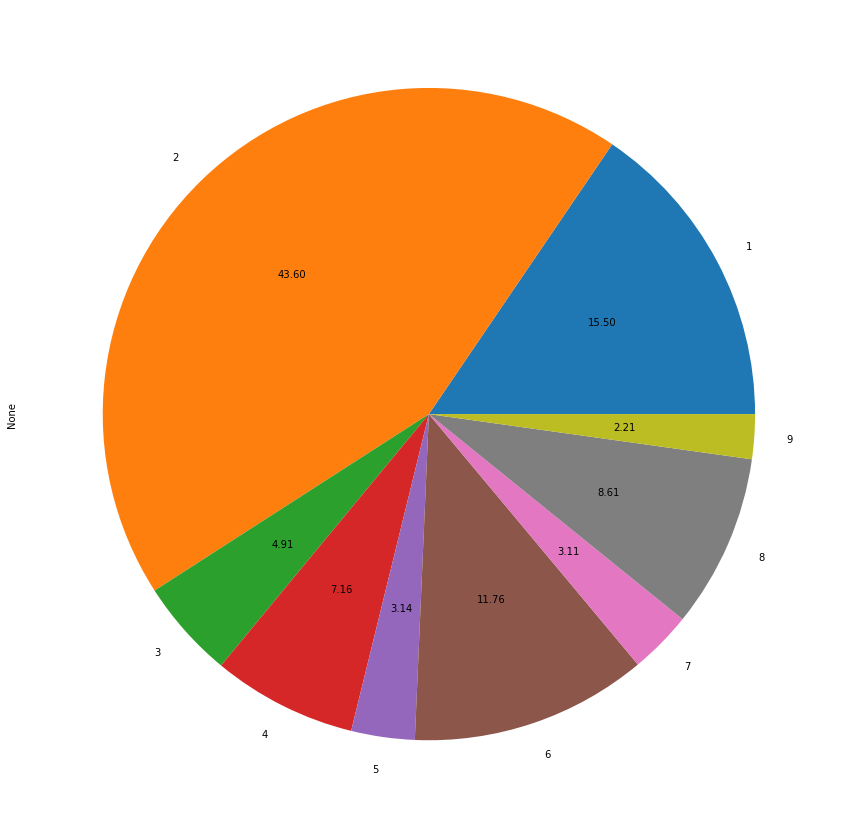

In [297]:
plt.figure(figsize=(15,15))

df_mod=df[df['class']!=0]
df_mod.groupby('class').size().plot(kind='pie',autopct='%.2f')

In [212]:
x= df[df['class']!=0].iloc[:, :-1].values
y = to_categorical(df[df['class']!=0].iloc[:, -1].values, 
                        num_classes= np.unique(Y).shape[0], dtype='float32') 


x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify = y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29943, 103), (12833, 103), (29943, 10), (12833, 10))

In [213]:
x

array([[1447, 1113,  973, ..., 1660, 1643, 1610],
       [1203, 1304, 1402, ..., 1075, 1126, 1182],
       [1579, 1498, 1299, ..., 1137, 1145, 1161],
       ...,
       [ 758,  439,  489, ..., 2751, 2734, 2720],
       [1000,  741,  802, ..., 2870, 2895, 2899],
       [ 950,  644,  476, ..., 2688, 2699, 2736]], dtype=uint16)

(10,)

In [214]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [215]:
#from sklearn.preprocessing import StandardScaler

#scl=StandardScaler()
#x_train_scaled=scl.fit_transform(x_train)
#x_test_scaled=scl.fit_transform(x_test)

In [216]:
#x_train_scaled

# Test-2: With PCA+RF

In [225]:
x_train_pca=PCA(n_components=10).fit_transform(x_train)
x_test_pca=PCA(n_components=10).fit_transform(x_test)

In [226]:
len(x_train_pca[0])

10

In [229]:
clf1=RandomForestClassifier().fit(x_train_pca,y_train)
y_pred1=np.argmax(clf1.predict(x_test_pca),axis=1)
len(y_test),len(y_pred1)

(12833, 12833)

In [230]:
y_test.shape,y_pred1.shape

((12833, 10), (12833,))

In [234]:
y_test=np.argmax(y_test, 1)
y_test,y_pred1

(array([8, 8, 2, ..., 8, 8, 2], dtype=int64),
 array([8, 0, 6, ..., 1, 0, 2], dtype=int64))

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ",accuracy_score(y_test,y_pred1))

print("\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred1))
print("\nCLASSIFICATION REPORT:\n ",classification_report(y_test,y_pred1))

Accuracy:  0.603678017610847

Confusion Matrix:
  [[   0    0    0    0    0    0    0    0    0    0]
 [ 264 1646    3   30    0    1    7   16   21    1]
 [ 458    0 3230    3  252    0 1646    0    6    0]
 [ 355  199    0   38    0    0    0    0   38    0]
 [  32    0   65    0  819    0    3    0    0    0]
 [   5    0    0    0    0  398    0    0    0    0]
 [ 122    3  464    0    3    0  916    0    1    0]
 [  94  287    0    0    0    0    0   17    1    0]
 [ 579  106    3   16    0    0    2    0  399    0]
 [   0    0    0    0    0    0    0    0    0  284]]

CLASSIFICATION REPORT:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      0.83      0.78      1989
           2       0.86      0.58      0.69      5595
           3       0.44      0.06      0.11       630
           4       0.76      0.89      0.82       919
           5       1.00      0.99      0.99       403
           6  

D:\Anaconda\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
new_x_train[0]

array([ 4.06306034e+01,  1.34110889e+01, -9.36701883e+00, -1.37451743e+00,
        3.31275785e-01,  6.34435990e-02, -6.26478755e-01, -9.66589517e-03,
       -2.84051037e-01, -2.25120991e-01, -8.66568519e-02, -1.42337533e-01,
        7.80092568e-02,  8.30293846e-02,  1.27726051e-02,  2.00857803e-02,
       -2.27543875e-02, -2.04533934e-02,  7.75302147e-02,  9.42776344e-02,
       -4.20513501e-02,  3.62001058e-02,  2.92266283e-02, -3.76364834e-03,
        3.61658201e-02,  7.71579739e-02, -9.21415047e-02, -1.28330301e-02,
       -3.26350635e-02,  4.27791986e-02, -2.22618928e-02,  1.19069862e-01,
       -6.44192983e-02,  6.83282867e-02, -2.90448425e-02,  2.63046624e-02,
        7.59365532e-03,  2.63442158e-02,  4.26197927e-02, -9.01843082e-02,
       -4.45634010e-02, -5.06075701e-02,  2.33284428e-02, -1.21142719e-02,
        2.97445035e-02,  3.35910727e-02, -2.10060368e-02,  4.44351214e-02,
       -6.56579915e-02,  1.78399817e-02])

## Display the bands after PCA

In [124]:
reduced_data=pd.concat([pd.DataFrame(data =x_train_pca), pd.DataFrame(data = y.ravel())], axis = 1)

In [125]:
reduced_data.head()

0            1           2           3           4           5  \
0 -7351.185536  6495.817393 -905.866727  183.022240   71.552294 -224.752910   
1  -533.722504    48.559728  951.526300 -242.680873  124.471124  -78.821503   
2 -1582.284053  1612.100857  716.645786 -256.665814  -59.155294 -112.634151   
3 -6575.122108  4597.651635 -980.121764  -19.694065 -472.138440  743.962590   
4 -2981.484743  1279.849355  -83.464774 -106.047722 -419.981576  -69.428142   

            6           7           8           9    0  
0 -256.449315  238.013962  204.932333  348.718918  0.0  
1 -277.791591 -118.354924  -64.913655   -8.655473  1.0  
2 -168.498164  288.932070  211.450711  131.342797  0.0  
3  157.676441  446.874752  -88.036419  161.650875  0.0  
4  121.687401  212.217824   45.456077  -59.306982  0.0

In [126]:
np.array(reduced_data).shape

(427760, 11)

In [127]:
x.shape

(42776, 103)

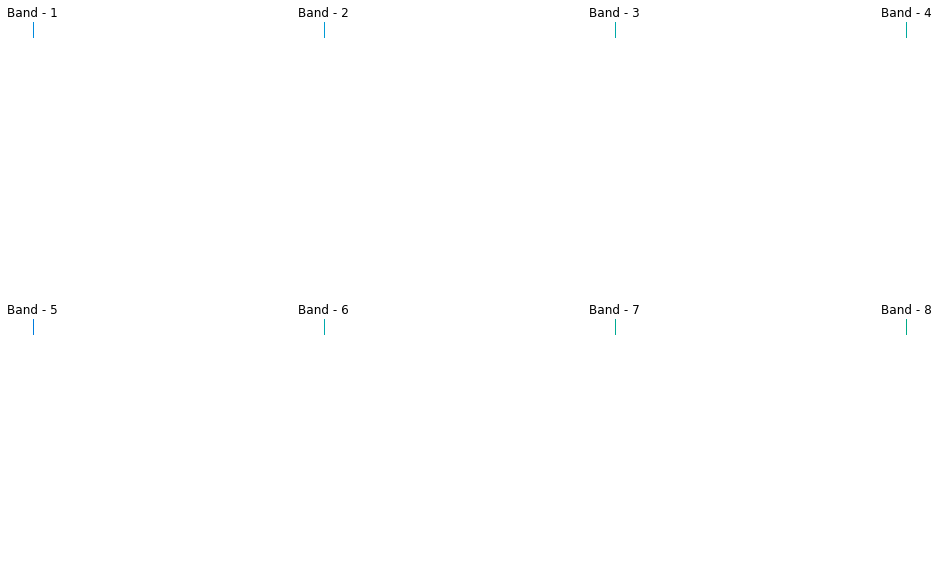

In [131]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(reduced_data.loc[:,i].values.reshape(427760,1), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

# Test-3: Without any reduction technique

In [240]:
x

array([[1447, 1113,  973, ..., 1660, 1643, 1610],
       [1203, 1304, 1402, ..., 1075, 1126, 1182],
       [1579, 1498, 1299, ..., 1137, 1145, 1161],
       ...,
       [ 758,  439,  489, ..., 2751, 2734, 2720],
       [1000,  741,  802, ..., 2870, 2895, 2899],
       [ 950,  644,  476, ..., 2688, 2699, 2736]], dtype=uint16)

In [241]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [242]:
x_train.shape,y_train.shape

((29943, 103), (29943,))

In [243]:
clf3=RandomForestClassifier().fit(x_train,y_train)
y_pred3=clf3.predict(x_test)

In [244]:
accuracy_score(y_pred3,y_test)

0.9270630405984571

# Create a BenchMark model

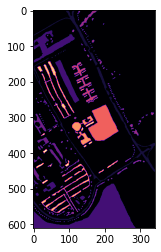

In [209]:
cmap='magma'
plt.imshow(Y,cmap=cmap)

In [238]:
y_train.shape,y_test.shape

((29943, 10), (12833,))

In [239]:
#clf=[]
li=[LogisticRegression(),     SVC(),                        KNeighborsClassifier(), DecisionTreeClassifier(),
    RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(),   XGBClassifier()]
acc=[]
y_train=np.argmax(y_train,1)
print("Training....")
for i in range(len(li)):
    clf=li[i].fit(x_train_pca,y_train)
    pred=clf.predict(x_test_pca)
    accuracy=accuracy_score(y_test,pred)
    acc.append(accuracy)
    print("{0}-done".format(i))
print("Done!")


acc

Training....


D:\Anaconda\envs\MyEnv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0-done
1-done
2-done
3-done
4-done
5-done
6-done


D:\Anaconda\envs\MyEnv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7-done
Done!


[0.6021974596742773,
 0.6633678796851866,
 0.7274994155692356,
 0.6001714330242344,
 0.6681212499025949,
 0.672640847814229,
 0.6952388373723993,
 0.6481726798098651]

## Hyperparameter tuning on Bechmark model/

In [238]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'leaf_size':list(range(1,50)),
               'n_neighbors': list(range(1,30)),
               'p': [1,2]}

Final_clf = KNeighborsClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = Final_clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(new_x_train,y_train)


knn_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.1min finished


{'p': 1, 'n_neighbors': 5, 'leaf_size': 47}

In [240]:
final_clf=KNeighborsClassifier(p=1, n_neighbors=5, leaf_size=47).fit(new_x_train,y_train)

accuracy_score(final_clf.predict(new_x_test),y_test)

0.7858612305965962

# Test:5 Using MLP

In [263]:
x.shape,y.shape

((42776, 103), (42776, 10))

In [265]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(x_train)
X_testscaled=sc_X.transform(x_test)

In [273]:
clf = MLPClassifier(hidden_layer_sizes=256,activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)

accuracy_score(np.argmax(y_pred,1),y_test)

0.952622146029767

# Test:6 Using ANN

In [245]:
pd.DataFrame(new_x_train)

0             1            2           3           4   \
0      27596.219807  13982.187805 -5220.471765 -764.926193  169.514636   
1      -4211.699097     94.049002  -706.377190 -134.634044 -429.228633   
2      -2735.132097  -2344.990748  -463.855926 -223.544517 -233.498540   
3       5275.482271   -785.417118  1362.633128  130.713647  340.312144   
4       6086.589405  -2219.521420   757.447143  119.607744  273.907497   
...             ...           ...          ...         ...         ...   
32077  -2571.809980   -159.006431   183.797009 -446.218009  -99.747313   
32078  -4276.757874   1369.660632  -287.409198 -378.900551 -218.206080   
32079   3350.812231  -3877.455548  -106.215394  -20.734021  331.695443   
32080  -3037.583423    965.852475  -109.108293 -335.762575 -431.695502   
32081  -2482.445731  -1861.238473  -257.302610 -339.712355  187.114211   

               5           6           7           8           9   ...  \
0     -180.418868 -272.807208   -9.312730   66.154095 -150.090553  ...   
1      174.633268   40.184880  -99.199903   -2.237377   59.640127  ...   
2      188.806675  248.989020   76.048320  131.661636    2.513872  ...   
3      111.630266   39.285225  147.818647  166.476082  -15.309064  ...   
4      456.056673  150.310358  161.615478  -41.404937   99.811405  ...   
...           ...         ...         ...         ...         ...  ...   
32077   80.729480  145.352475 -217.006532  -38.990235 -127.285060  ...   
32078  119.930373 -311.641945  -48.029209  -56.354091    5.857836  ...   
32079   50.984011 -170.128069  187.410674 -117.545623   15.064472  ...   
32080  195.156859  153.578899   45.098544  198.679488  -51.423301  ...   
32081 -102.989878  234.368626  -22.928776  -33.349542  117.162891  ...   

              40         41         42         43         44         45  \
0      11.497207 -23.257254  61.587555  41.444089  31.762862 -31.154879   
1       0.771481  -1.980664 -14.901090  59.007277  33.778535  15.538830   
2     -20.628717 -30.692837  62.327581  18.753968  22.515998 -19.215086   
3      -8.967645  20.600877   0.177776  21.282475   5.143358 -33.617711   
4     -23.320279  -2.670845 -16.592928  20.770050  19.521678 -42.930057   
...          ...        ...        ...        ...        ...        ...   
32077  -0.304051  23.686310   4.263541  27.477692 -18.790555 -44.842050   
32078 -21.011670  20.534549   5.496787   5.865979 -11.059553 -28.407375   
32079  17.319696  56.615183 -25.501333 -11.670984  -1.606495  -0.201943   
32080 -25.086351  11.097341 -39.348934 -16.079031 -25.979765 -14.800727   
32081   6.942305  -5.372778  -1.175642  15.869127   8.343227  11.657894   

              46         47         48         49  
0       6.243065  27.124958  -4.393128  27.061289  
1       8.853178  21.743208  -9.561631 -27.531348  
2      19.166205   1.911065  12.557739  20.124518  
3      12.717048   7.601735  11.998071   1.356126  
4     -32.523563  -9.731164   3.051946 -26.621984  
...          ...        ...        ...        ...  
32077  -1.885203   5.365805   8.563587  -0.673674  
32078  -2.474950  15.090267   2.847986  11.045440  
32079  -0.605300  27.843727  12.265997  -9.406837  
32080  37.695928  39.491477  -6.185132   9.891714  
32081  14.223937  11.385787 -15.272562 -36.830773  

[32082 rows x 50 columns]

In [253]:
new_x_train.shape

(32082, 50)

In [247]:
x_train.shape,y_train.shape

((29943, 103), (29943,))

In [25]:
y_train

22223     0
20953     0
120406    0
21627     0
26940     0
         ..
176963    0
117952    0
173685    0
43567     0
199340    1
Name: class, Length: 155550, dtype: uint8

In [249]:
y_train

array([2, 2, 2, ..., 6, 1, 8], dtype=int64)

In [250]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [251]:
y_train.shape,y_test.shape

((29943, 10), (12833, 10))

In [253]:
from keras.models import Sequential
ann=Sequential()
ann.add(Dense(input_dim=103, units=100, activation='relu'))
ann.add(Dense(units=200, activation='relu'))
ann.add(Dense(units=400, activation='relu'))
ann.add(Dense(units=800, activation='relu'))
ann.add(Dense(units=400, activation='relu'))
ann.add(Dense(units=200, activation='relu'))
ann.add(Dense(units=100, activation='relu'))
ann.add(Dense(units=10,activation='softmax'))
ann.compile(loss='CategoricalCrossentropy',optimizer='Adam', metrics=['accuracy'])
history=ann.fit(x_train,
                y_train,
                epochs=50,
                validation_data=(x_test,y_test))

Epoch 1/50
936/936 [==============================] - 9s 10ms/step - loss: 2.6402 - accuracy: 0.7416 - val_loss: 0.6946 - val_accuracy: 0.7383
Epoch 2/50
936/936 [==============================] - 9s 10ms/step - loss: 0.5935 - accuracy: 0.7790 - val_loss: 0.6577 - val_accuracy: 0.7647
Epoch 3/50
936/936 [==============================] - 9s 10ms/step - loss: 0.5492 - accuracy: 0.7889 - val_loss: 0.4925 - val_accuracy: 0.8120
Epoch 4/50
936/936 [==============================] - 9s 10ms/step - loss: 0.5355 - accuracy: 0.7998 - val_loss: 0.4821 - val_accuracy: 0.8053
Epoch 5/50
936/936 [==============================] - 9s 10ms/step - loss: 0.5104 - accuracy: 0.8073 - val_loss: 0.4464 - val_accuracy: 0.8293
Epoch 6/50
936/936 [==============================] - 9s 10ms/step - loss: 0.4945 - accuracy: 0.8128 - val_loss: 0.5600 - val_accuracy: 0.7970
Epoch 7/50
936/936 [==============================] - 9s 10ms/step - loss: 0.4871 - accuracy: 0.8164 - val_loss: 0.4486 - val_accuracy: 0.8195

In [254]:
y_pred = np.argmax(ann.predict(x_test), axis=1)

y_test=[np.where(r!=0)[0][0] for r in y_test]  #convert one hot label to integers

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 100)               10400     
_________________________________________________________________
dense_175 (Dense)            (None, 200)               20200     
_________________________________________________________________
dense_176 (Dense)            (None, 400)               80400     
_________________________________________________________________
dense_177 (Dense)            (None, 800)               320800    
_________________________________________________________________
dense_178 (Dense)            (None, 400)               320400    
_________________________________________________________________
dense_179 (Dense)            (None, 200)               80200     
_________________________________________________________________
dense_180 (Dense)            (None, 100)              

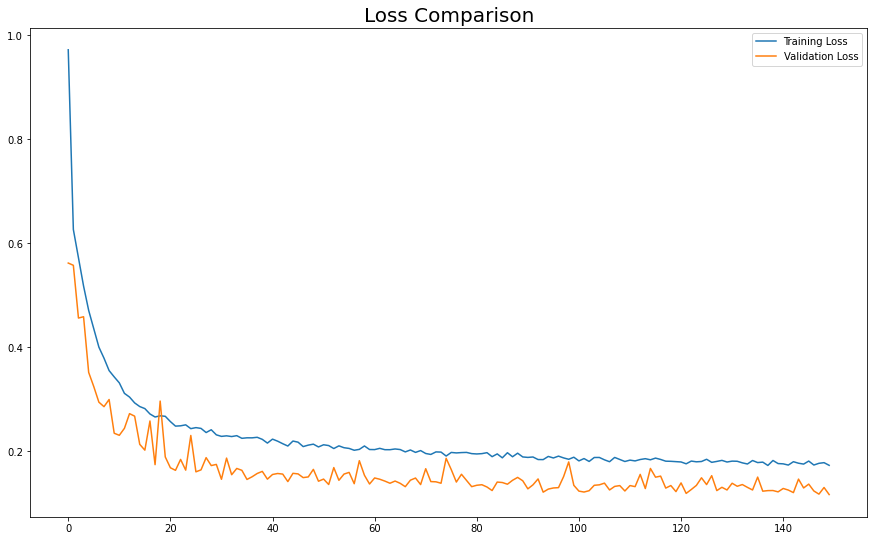

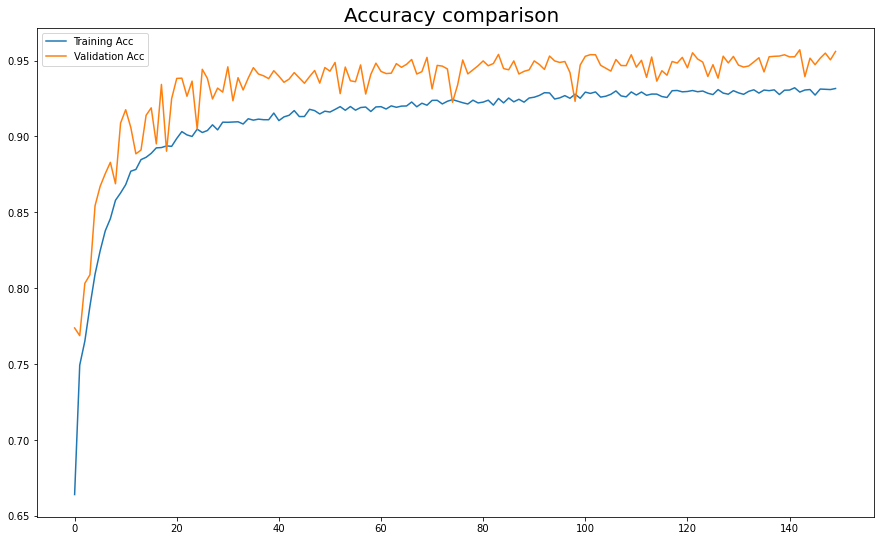

In [255]:
ann.summary()

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,y_pred))

print("*-*"*40)
print("\nConfusion Matrix:\n\n",confusion_matrix(y_pred, y_test))
#print("*-*"*40)
print("\n\nClassification Report:\n",classification_report(y_pred, y_test,
                                  target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees','5. Painted metal sheets',
                                                  '6. Bare Soil', '7. Bitumen', '8. Self-Blocking Bricks', '9. Shadows']))
print("*-*"*40)

plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history1.history['loss'],)
plt.plot(history1.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history1.history['accuracy'],)
plt.plot(history1.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

# Test-7: Using CNN

In [86]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = x_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization())

model.add(Dense(128, activation= 'relu'))

model.add(Dense(256, activation= 'relu'))

model.add(Dense(128, activation= 'relu'))

model.add(Dense(64, activation= 'relu'))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))


model.add(Dense(y_train.shape[1], activation= 'softmax'))


# Compile
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history1 = model.fit(x = x_train, 
                     y = y_train,
                     validation_data = (x_test, y_test), 
                     epochs = 150)

Epoch 1/150
936/936 [==============================] - 8s 8ms/step - loss: 0.9715 - accuracy: 0.6640 - val_loss: 0.5614 - val_accuracy: 0.7738
Epoch 2/150
936/936 [==============================] - 8s 8ms/step - loss: 0.6260 - accuracy: 0.7493 - val_loss: 0.5571 - val_accuracy: 0.7687
Epoch 3/150
936/936 [==============================] - 8s 8ms/step - loss: 0.5712 - accuracy: 0.7651 - val_loss: 0.4556 - val_accuracy: 0.8032
Epoch 4/150
936/936 [==============================] - 8s 8ms/step - loss: 0.5172 - accuracy: 0.7882 - val_loss: 0.4582 - val_accuracy: 0.8089
Epoch 5/150
936/936 [==============================] - 8s 9ms/step - loss: 0.4703 - accuracy: 0.8092 - val_loss: 0.3511 - val_accuracy: 0.8544
Epoch 6/150
936/936 [==============================] - 8s 8ms/step - loss: 0.4352 - accuracy: 0.8246 - val_loss: 0.3238 - val_accuracy: 0.8671
Epoch 7/150
936/936 [==============================] - 8s 8ms/step - loss: 0.3997 - accuracy: 0.8378 - val_loss: 0.2939 - val_accuracy: 0.8755

936/936 [==============================] - 14s 15ms/step - loss: 0.1836 - accuracy: 0.9272 - val_loss: 0.1550 - val_accuracy: 0.9390
Epoch 114/150
936/936 [==============================] - 15s 16ms/step - loss: 0.1852 - accuracy: 0.9280 - val_loss: 0.1277 - val_accuracy: 0.9524
Epoch 115/150
936/936 [==============================] - 13s 14ms/step - loss: 0.1831 - accuracy: 0.9279 - val_loss: 0.1664 - val_accuracy: 0.9365
Epoch 116/150
936/936 [==============================] - 13s 14ms/step - loss: 0.1863 - accuracy: 0.9263 - val_loss: 0.1496 - val_accuracy: 0.9433
Epoch 117/150
936/936 [==============================] - 13s 14ms/step - loss: 0.1837 - accuracy: 0.9257 - val_loss: 0.1516 - val_accuracy: 0.9404
Epoch 118/150
936/936 [==============================] - 14s 15ms/step - loss: 0.1804 - accuracy: 0.9302 - val_loss: 0.1286 - val_accuracy: 0.9494
Epoch 119/150
936/936 [==============================] - 15s 16ms/step - loss: 0.1801 - accuracy: 0.9303 - val_loss: 0.1335 - val_ac

In [175]:
y_pred = np.argmax(model.predict(x_test), axis=1)

y_test=[np.where(r!=0)[0][0] for r in y_test]  #convert one hot label to integers

Model: "Pavia_University"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 103)               412       
_________________________________________________________________
dense_94 (Dense)             (None, 128)               13312     
_________________________________________________________________
dense_95 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 1024)         

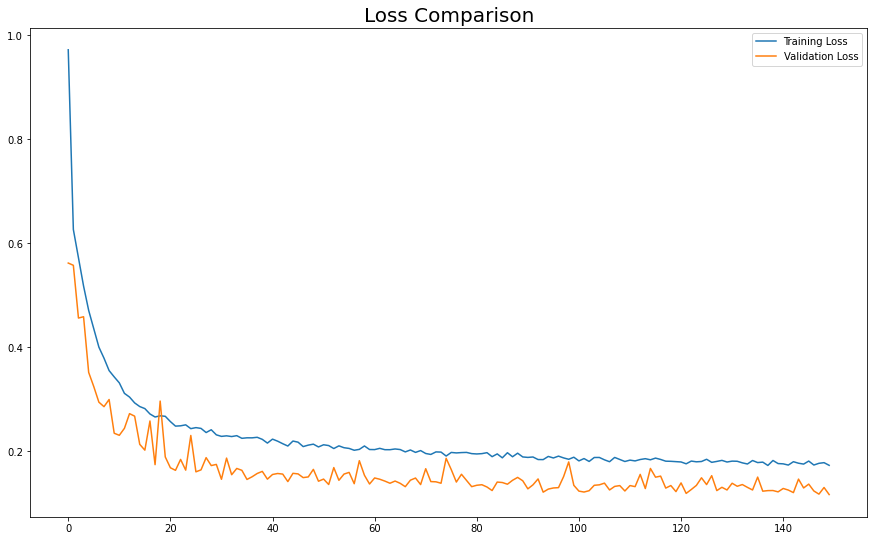

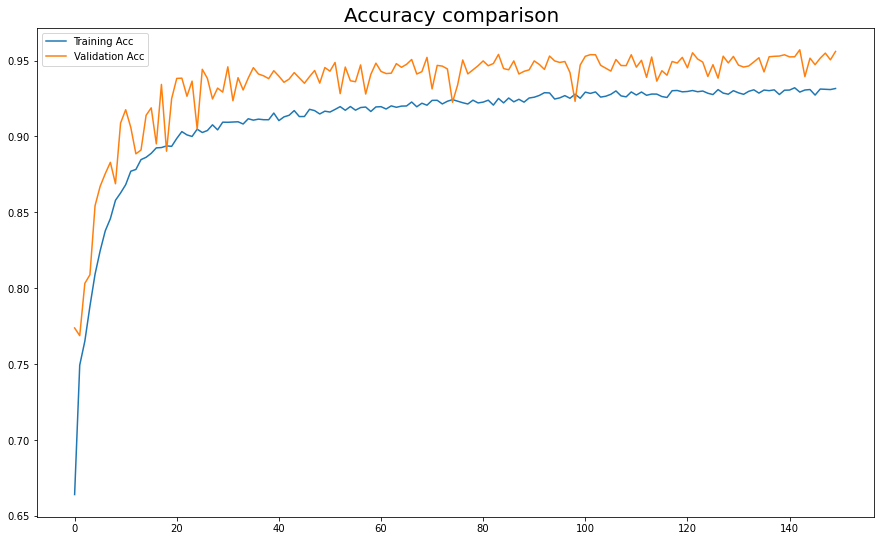

In [176]:
model.summary()

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,y_pred))

print("*-*"*40)
print("\nConfusion Matrix:\n\n",confusion_matrix(y_pred, y_test))
#print("*-*"*40)
print("\n\nClassification Report:\n",classification_report(y_pred, y_test,
                                  target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees','5. Painted metal sheets',
                                                  '6. Bare Soil', '7. Bitumen', '8. Self-Blocking Bricks', '9. Shadows']))
print("*-*"*40)

plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history1.history['loss'],)
plt.plot(history1.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history1.history['accuracy'],)
plt.plot(history1.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

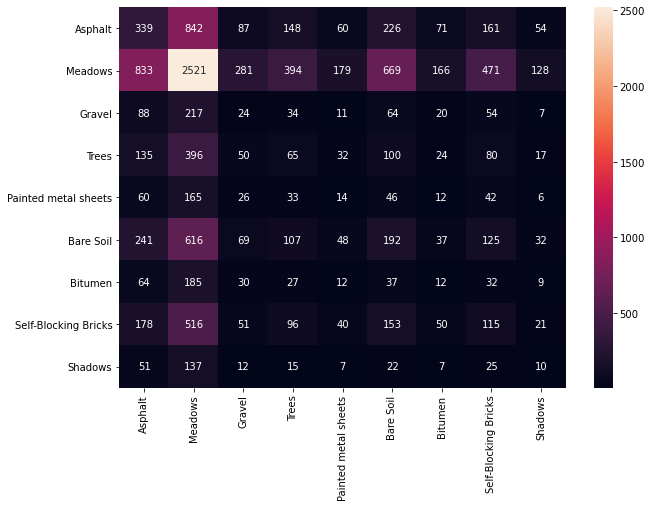

In [162]:
plt.figure(figsize = (10,7))

classes = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets',
            'Bare Soil', 'Bitumen', 'Self-Blocking Bricks', 'Shadows']

mat = confusion_matrix(y_pred,y_test)

df_cm = pd.DataFrame(mat, index = classes, columns = classes)

sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()

In [96]:
model.save("PaviaUniversity_HSI_Classifer.h5")

In [168]:
model1=load_model("PaviaUniversity_HSI_Classifer.h5")
model1.summary()

Model: "Pavia_University"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 103)               412       
_________________________________________________________________
dense_94 (Dense)             (None, 128)               13312     
_________________________________________________________________
dense_95 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 1024)         

In [3]:
#got CNN have higher accuracy
acc.append(0.952622)
acc.append(0.922153)
acc.append(0.962518)
fig=pg.Figure()
fig.add_trace(pg.Scatter(x=['LR','SVC','KNN','DT','RF','GB','AdaB','XGB','MLP','ANN','CNN'],
                           y=list(acc)
))